In [ ]:
import os
import sys
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
import config

In [ ]:
print("Loading data...")
train_transform, val_test_transform = transforms.Compose([
    transforms.RandomResizedCrop(config.IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
]), transforms.Compose([
    transforms.Resize(int(config.IMAGE_SIZE * 1.1)),
    transforms.CenterCrop(config.IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
])

full_train_dataset = datasets.ImageFolder(config.TRAIN_DIR, transform=train_transform)
test_dataset = datasets.ImageFolder(config.TEST_DIR, transform=val_test_transform)


num_train = len(full_train_dataset)
num_val = int(0.15 * num_train)
num_train = num_train - num_val
train_dataset, val_dataset = random_split(full_train_dataset, [num_train, num_val])


val_dataset.dataset.transform = val_test_transform

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

class_names = full_train_dataset.classes
print(f"Classes: {class_names}")


train_loader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True, num_workers=os.cpu_count() // 2)
val_loader = DataLoader(val_dataset, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=os.cpu_count() // 2)
test_loader = DataLoader(test_dataset, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=os.cpu_count() // 2)

Loading data...
Number of training samples: 528
Number of validation samples: 93
Number of test samples: 185
Classes: ['Fish', 'Goldfish', 'Harbor seal', 'Jellyfish', 'Lobster', 'Oyster', 'Sea turtle', 'Squid', 'Starfish']


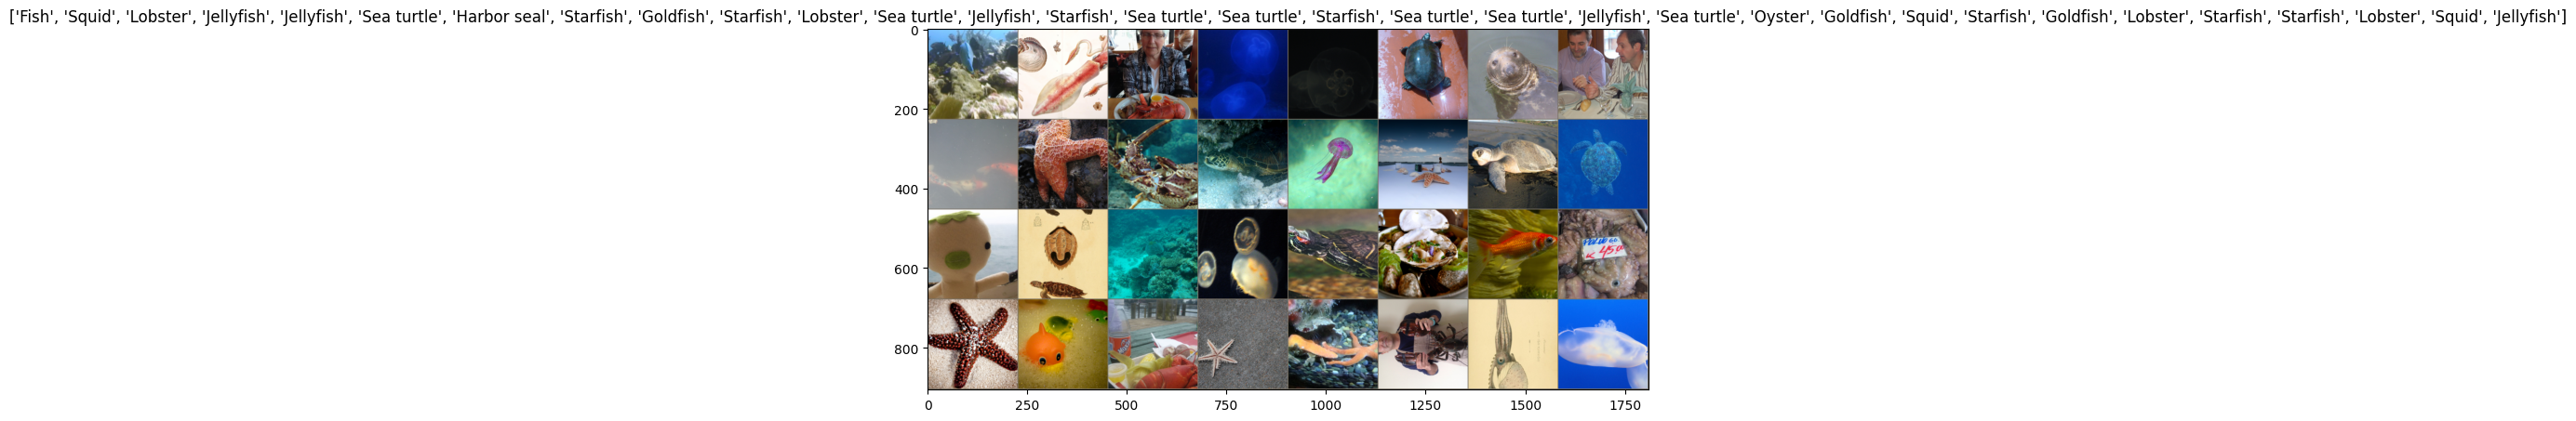


Data loading and preprocessing complete. Ready for model training.


In [ ]:
import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(config.IMAGENET_MEAN)
    std = np.array(config.IMAGENET_STD)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


inputs, classes = next(iter(train_loader))

out = torchvision.utils.make_grid(inputs)

plt.figure(figsize=(10, 10))
imshow(out, title=[class_names[x] for x in classes])
plt.show()

print("\nData loading and preprocessing complete. Ready for model training.")